In [3]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

%matplotlib inline

planeturl = "https://exo.mast.stsci.edu/api/v0.1/exoplanets/"
dvurl = "https://exo.mast.stsci.edu/api/v0.1/dvdata/tess/"
header={}

In [27]:
planet_name = "WASP-18 b"

url = planeturl + "/identifiers/"

myparams = {"name":planet_name}

r = requests.get(url = url, params = myparams, headers = header)
print(r.headers.get('content-type'))

application/json


In [33]:
planet_names = r.json()
ticid = planet_names['tessID']
tce = planet_names['tessTCE']

In [35]:
url = planeturl + planet_name + "/properties/"

r = requests.get(url = url, headers = header)

planet_prop = r.json()

print("Catalog 1: " + planet_prop[0]['catalog_name'])
print("Catalog 2: " + planet_prop[1]['catalog_name'])

Catalog 1: exoplanets.org
Catalog 2: nexsci


In [17]:
print("WASP-18 b Properties")
print("Stellar Mass %f %s" % (planet_prop[0]['Ms'], planet_prop[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop[0]['Mp'], planet_prop[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop[0]['Mp_ref']))

WASP-18 b Properties
Stellar Mass 1.220000 M_sun
Planet Mass 10.200600 M_Jupiter
Planet Mass Reference: Calculated from MSINI and I


In [39]:
url = dvurl + str(ticid) + '/tces/'
myparams = {"tce" : tce}

r = requests.get(url = url, params = myparams, headers = header)
sectorInfo = r.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0001-s0003',
 's0001-s0036',
 's0001-s0069',
 's0002-s0002',
 's0003-s0003',
 's0029-s0029',
 's0030-s0030',
 's0069-s0069']

In [41]:
url = dvurl + str(ticid) + '/info/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tceInfo = r.json()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

TIC: TIC 100100827
Planet Radius: 12.979840


In [52]:
# Get The data
url = dvurl + str(ticid) + '/table/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tce_data = r.json()
data = pd.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['PHASE', 'LC_DETREND', 'MODEL_INIT'], dtype='object')

Text(0, 0.5, 'Relative Flux')

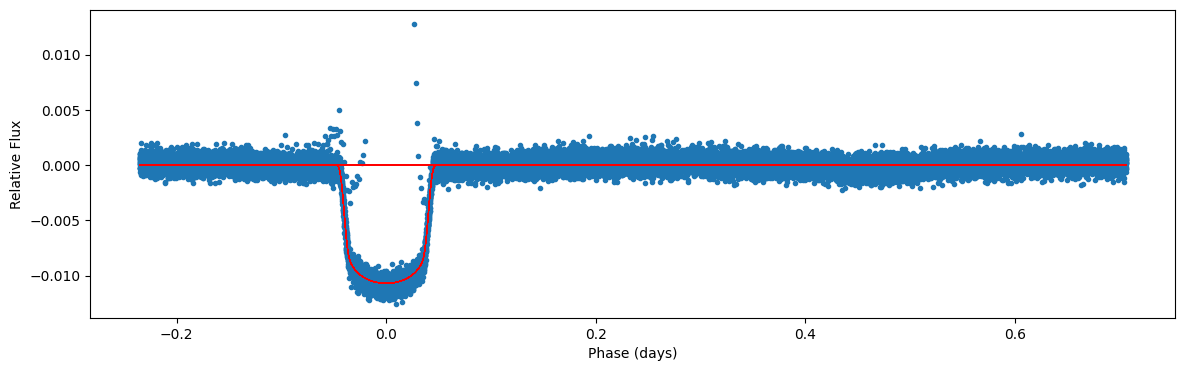

In [54]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['PHASE']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('Phase (days)')
plt.ylabel('Relative Flux')